In [1]:
import pandas as pd
import numpy as np
import datetime
from google.colab import files # Used to print the glossary image of the data on the notebook.
from IPython.display import Image # Used to print the glossary image of the data on the notebook.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
teams_path = "/content/drive/MyDrive/Colab Notebooks/Mastermind_colab/Personal_notebooks/Proyectos/Nba/CSV_data/Team_stats2324 _NBA.csv"

df_teams = pd.read_csv(teams_path)

In [ ]:
df_teams.columns

Index(['RANK', 'TEAM', 'CONF', 'DIVISION', 'GP', 'PPG', 'oPPG', 'pDIFF',
       'PACE', 'oEFF', 'dEFF', 'eDIFF', 'SOS', 'rSOS', 'SAR', 'CONS', 'A4F',
       'W', 'L', 'WIN%', 'eWIN%', 'pWIN%', 'ACH', 'STRK'],
      dtype='object')

# 1. Data cleaning

In [ ]:
uploaded = files.upload()

Saving Team_glossary.png to Team_glossary.png


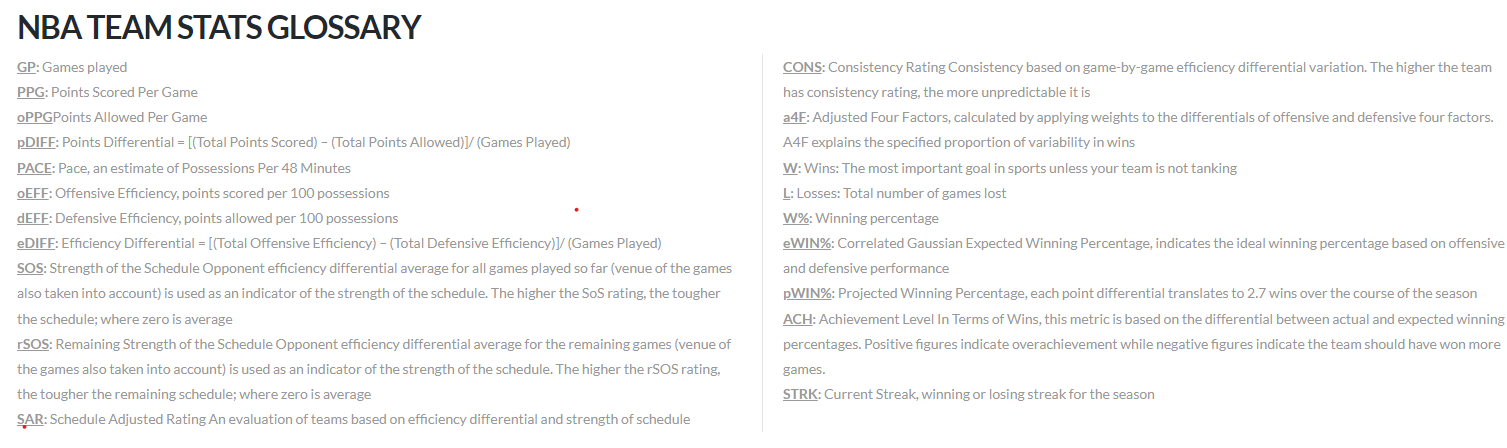

In [ ]:
Image("Team_glossary.png")

In [ ]:
df_teams.head()

,RANK,TEAM,CONF,DIVISION,GP,PPG,oPPG,pDIFF,PACE,oEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,NaN,Boston,East,Atlantic,45,120.8,110.6,10.2,98.2,121.7,...,10.06,15.0,0.077,35,10,0.778,0.754,0.836,0.024,3
1,NaN,Milwaukee,East,Central,44,124.6,120.4,4.2,101.8,121.5,...,2.52,14.1,0.068,31,13,0.705,0.615,0.638,0.090,3
2,NaN,Philadelphia,East,Atlantic,43,119.8,112.0,7.8,99.1,120.4,...,5.12,16.9,-0.015,29,14,0.674,0.677,0.757,-0.003,-1
3,NaN,New York,East,Atlantic,45,115.2,109.8,5.4,97.2,118.5,...,5.51,15.8,0.023,28,17,0.622,0.636,0.678,-0.014,5
4,NaN,Cleveland,East,Central,42,114.0,110.1,3.9,98.1,115.7,...,3.79,15.4,0.043,26,16,0.619,0.605,0.628,0.014,-1


In [ ]:
df_teams.drop(['DIVISION', 'pDIFF', 'eDIFF', 'SOS', 'rSOS', 'SAR', 'CONS', 'A4F', 'eWIN%', 'ACH', 'STRK'], axis=1, inplace=True)

In [ ]:
df_teams.head()

,RANK,TEAM,CONF,GP,PPG,oPPG,PACE,oEFF,dEFF,W,L,WIN%,pWIN%
0,NaN,Boston,East,45,120.8,110.6,98.2,121.7,111.4,35,10,0.778,0.836
1,NaN,Milwaukee,East,44,124.6,120.4,101.8,121.5,117.4,31,13,0.705,0.638
2,NaN,Philadelphia,East,43,119.8,112.0,99.1,120.4,112.6,29,14,0.674,0.757
3,NaN,New York,East,45,115.2,109.8,97.2,118.5,113.0,28,17,0.622,0.678
4,NaN,Cleveland,East,42,114.0,110.1,98.1,115.7,111.6,26,16,0.619,0.628


In [ ]:
df_teams.columns = df_teams.columns.str.replace('%', '_per').str.lower()

In [ ]:
df_teams.head()

,rank,team,conf,gp,ppg,oppg,pace,oeff,deff,w,l,win_per,pwin_per
0,NaN,Boston,East,45,120.8,110.6,98.2,121.7,111.4,35,10,0.778,0.836
1,NaN,Milwaukee,East,44,124.6,120.4,101.8,121.5,117.4,31,13,0.705,0.638
2,NaN,Philadelphia,East,43,119.8,112.0,99.1,120.4,112.6,29,14,0.674,0.757
3,NaN,New York,East,45,115.2,109.8,97.2,118.5,113.0,28,17,0.622,0.678
4,NaN,Cleveland,East,42,114.0,110.1,98.1,115.7,111.6,26,16,0.619,0.628


In [ ]:
df_teams[["win_per", "pwin_per"]] = df_teams[["win_per", "pwin_per"]] * 100

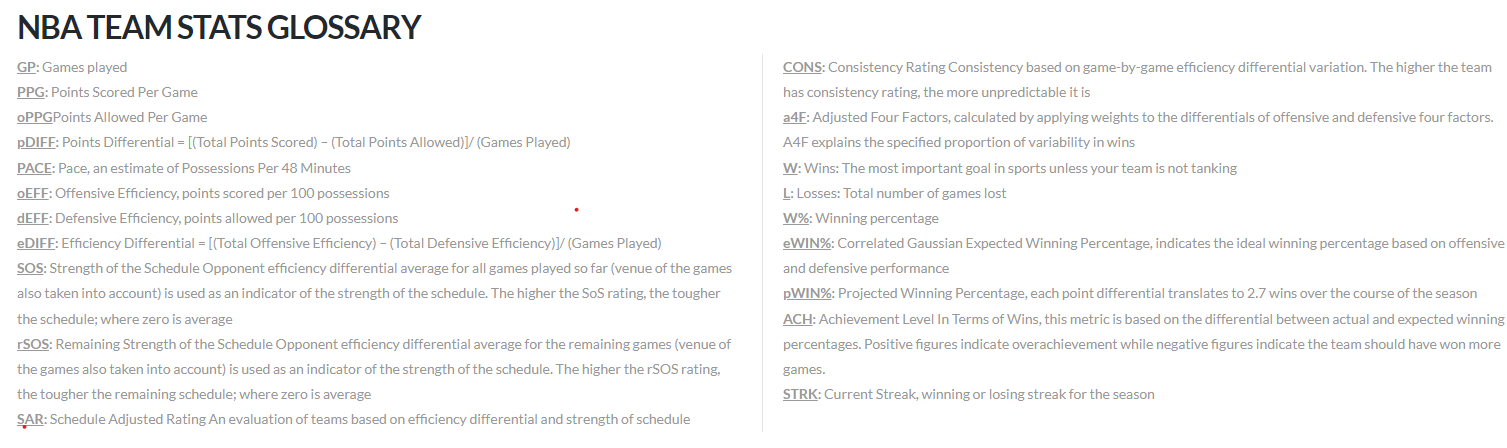

In [ ]:
Image("Team_glossary.png")

In [ ]:
df_teams.columns

Index(['rank', 'team', 'conf', 'gp', 'ppg', 'oppg', 'pace', 'oeff', 'deff',
       'w', 'l', 'win_per', 'pwin_per'],
      dtype='object')

In [ ]:
df_teams.rename(columns={"gp":"games_played",
                         "oppg":"p_allow_g",
                         "pace":"possesions_pg",
                         "oeff":"pscore_per_100_pos",
                         "deff":"pallow_per_100_pos",
                         "pwin_per": "projected_win_per"}, inplace= True)

In [ ]:
df_teams.head()

,rank,team,conf,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per
0,NaN,Boston,East,45,120.8,110.6,98.2,121.7,111.4,35,10,77.8,83.6
1,NaN,Milwaukee,East,44,124.6,120.4,101.8,121.5,117.4,31,13,70.5,63.8
2,NaN,Philadelphia,East,43,119.8,112.0,99.1,120.4,112.6,29,14,67.4,75.7
3,NaN,New York,East,45,115.2,109.8,97.2,118.5,113.0,28,17,62.2,67.8
4,NaN,Cleveland,East,42,114.0,110.1,98.1,115.7,111.6,26,16,61.9,62.8


In [ ]:
df_teams["proj_wins"] = (((df_teams["projected_win_per"]/100) * 82).round(0)).apply(int)

In [ ]:
df_teams.drop(["rank"], axis=1, inplace = True)

In [ ]:
df_teams.head()

,team,conf,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
0,Boston,East,45,120.8,110.6,98.2,121.7,111.4,35,10,77.8,83.6,69
1,Milwaukee,East,44,124.6,120.4,101.8,121.5,117.4,31,13,70.5,63.8,52
2,Philadelphia,East,43,119.8,112.0,99.1,120.4,112.6,29,14,67.4,75.7,62
3,New York,East,45,115.2,109.8,97.2,118.5,113.0,28,17,62.2,67.8,56
4,Cleveland,East,42,114.0,110.1,98.1,115.7,111.6,26,16,61.9,62.8,51


# 2. Division per conference

In [ ]:
df_east_teams = df_teams.loc[df_teams['conf'] == 'East']
df_west_teams = df_teams.loc[df_teams['conf'] == 'West']

In [ ]:
df_east_teams.head()

,team,conf,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
0,Boston,East,45,120.8,110.6,98.2,121.7,111.4,35,10,77.8,83.6,69
1,Milwaukee,East,44,124.6,120.4,101.8,121.5,117.4,31,13,70.5,63.8,52
2,Philadelphia,East,43,119.8,112.0,99.1,120.4,112.6,29,14,67.4,75.7,62
3,New York,East,45,115.2,109.8,97.2,118.5,113.0,28,17,62.2,67.8,56
4,Cleveland,East,42,114.0,110.1,98.1,115.7,111.6,26,16,61.9,62.8,51


In [ ]:
df_west_teams.head()

,team,conf,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
15,Minnesota,West,45,113.1,107.5,98.1,114.8,109.1,32,13,71.1,68.4,56
16,Oklahoma City,West,44,121.9,113.6,100.2,121.1,112.8,31,13,70.5,77.3,63
17,Denver,West,46,115.2,111.1,97.0,118.8,114.6,31,15,67.4,63.5,52
18,LA Clippers,West,42,118.0,112.1,97.6,120.6,114.6,28,14,66.7,69.4,57
19,New Orleans,West,44,117.5,112.5,98.8,118.6,113.6,26,18,59.1,66.5,55


# 3. Teams ranked by win_per

In [ ]:
df_east_teams["conf_rank"] = np.nan
df_west_teams["conf_rank"] = np.nan

<ipython-input-107-26b2b5bd340a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_east_teams["conf_rank"] = np.nan
<ipython-input-107-26b2b5bd340a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west_teams["conf_rank"] = np.nan


In [ ]:
df_east_teams['conf_rank'].fillna(df_east_teams['win_per'].rank(ascending=False, method='min'), inplace=True)
df_east_teams= df_east_teams.sort_values(by='conf_rank', ascending=True)

<ipython-input-108-f1cae3ebda32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_east_teams['conf_rank'].fillna(df_east_teams['win_per'].rank(ascending=False, method='min'), inplace=True)


In [ ]:
df_west_teams['conf_rank'].fillna(df_west_teams['win_per'].rank(ascending=False, method='min'), inplace=True)
df_west_teams= df_west_teams.sort_values(by='conf_rank', ascending=True)

<ipython-input-109-d28611d7e05c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west_teams['conf_rank'].fillna(df_west_teams['win_per'].rank(ascending=False, method='min'), inplace=True)


In [ ]:
df_west_teams['conf_rank'] = df_west_teams['conf_rank'].apply(int)
df_east_teams['conf_rank'] = df_east_teams['conf_rank'].apply(int)

In [ ]:
df_west_teams.set_index("conf_rank", inplace = True)
df_east_teams.set_index("conf_rank", inplace = True)

In [ ]:
df_west_teams.drop(['conf'], axis=1, inplace=True)
df_east_teams.drop(['conf'], axis=1, inplace=True)

In [ ]:
df_west_teams.head()

,team,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
conf_rank,,,,,,,,,,,,
1,Minnesota,45,113.1,107.5,98.1,114.8,109.1,32,13,71.1,68.4,56
2,Oklahoma City,44,121.9,113.6,100.2,121.1,112.8,31,13,70.5,77.3,63
3,Denver,46,115.2,111.1,97.0,118.8,114.6,31,15,67.4,63.5,52
4,LA Clippers,42,118.0,112.1,97.6,120.6,114.6,28,14,66.7,69.4,57
5,New Orleans,44,117.5,112.5,98.8,118.6,113.6,26,18,59.1,66.5,55


In [ ]:
df_east_teams.head()

,team,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
conf_rank,,,,,,,,,,,,
1,Boston,45,120.8,110.6,98.2,121.7,111.4,35,10,77.8,83.6,69
2,Milwaukee,44,124.6,120.4,101.8,121.5,117.4,31,13,70.5,63.8,52
3,Philadelphia,43,119.8,112.0,99.1,120.4,112.6,29,14,67.4,75.7,62
4,New York,45,115.2,109.8,97.2,118.5,113.0,28,17,62.2,67.8,56
5,Cleveland,42,114.0,110.1,98.1,115.7,111.6,26,16,61.9,62.8,51


# 4. NBA teams ranked

In [ ]:
df_teams.columns

Index(['team', 'conf', 'games_played', 'ppg', 'p_allow_g', 'possesions_pg',
       'pscore_per_100_pos', 'pallow_per_100_pos', 'w', 'l', 'win_per',
       'projected_win_per', 'proj_wins'],
      dtype='object')

In [ ]:
df_teams_rank = df_teams[["team", "conf", "win_per"]]

In [ ]:
df_teams_rank["nba_rank"] = np.nan

<ipython-input-137-cbac0cc04701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_rank["nba_rank"] = np.nan


In [ ]:
df_teams_rank['nba_rank'].fillna(df_teams_rank['win_per'].rank(ascending=False, method='min'), inplace=True)
df_teams_rank= df_teams_rank.sort_values(by='nba_rank', ascending=True)

<ipython-input-138-cb797c403de3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_rank['nba_rank'].fillna(df_teams_rank['win_per'].rank(ascending=False, method='min'), inplace=True)


In [ ]:
df_teams_rank['nba_rank'] = df_teams_rank['nba_rank'].apply(int)

In [ ]:
df_teams_rank.set_index("nba_rank", inplace = True)

In [ ]:
df_teams_rank.head()

,team,conf,win_per
nba_rank,,,
1,Boston,East,77.8
2,Minnesota,West,71.1
3,Milwaukee,East,70.5
3,Oklahoma City,West,70.5
5,Philadelphia,East,67.4


# 5. Transforming the dataframes into a CSV

In [ ]:
df_west_teams.head()

,team,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
conf_rank,,,,,,,,,,,,
1,Minnesota,45,113.1,107.5,98.1,114.8,109.1,32,13,71.1,68.4,56
2,Oklahoma City,44,121.9,113.6,100.2,121.1,112.8,31,13,70.5,77.3,63
3,Denver,46,115.2,111.1,97.0,118.8,114.6,31,15,67.4,63.5,52
4,LA Clippers,42,118.0,112.1,97.6,120.6,114.6,28,14,66.7,69.4,57
5,New Orleans,44,117.5,112.5,98.8,118.6,113.6,26,18,59.1,66.5,55


In [ ]:
df_west_teams.to_csv('NBA_west_teams_clean.csv', index=False)

In [ ]:
df_east_teams.head()

,team,games_played,ppg,p_allow_g,possesions_pg,pscore_per_100_pos,pallow_per_100_pos,w,l,win_per,projected_win_per,proj_wins
conf_rank,,,,,,,,,,,,
1,Boston,45,120.8,110.6,98.2,121.7,111.4,35,10,77.8,83.6,69
2,Milwaukee,44,124.6,120.4,101.8,121.5,117.4,31,13,70.5,63.8,52
3,Philadelphia,43,119.8,112.0,99.1,120.4,112.6,29,14,67.4,75.7,62
4,New York,45,115.2,109.8,97.2,118.5,113.0,28,17,62.2,67.8,56
5,Cleveland,42,114.0,110.1,98.1,115.7,111.6,26,16,61.9,62.8,51


In [ ]:
df_east_teams.to_csv('NBA_east_teams_clean.csv', index=False)

In [ ]:
df_teams_rank.head()

,team,conf,win_per
nba_rank,,,
1,Boston,East,77.8
2,Minnesota,West,71.1
3,Milwaukee,East,70.5
3,Oklahoma City,West,70.5
5,Philadelphia,East,67.4


In [ ]:
df_teams_rank.to_csv('NBA_teams_ranked.csv', index=False)